# Indian Premier League (Data Analysis Report)

## 1. Problem Statement

This is Data Analysis Report on the IPL Matches from 2008 to 2019

## 2. Dataset Description

This dataset is taken from kaggle datasets which is data science and machine learning community.

Link of the Dataset is https://www.kaggle.com/nowke9/ipldata

In [1]:
#importing neccessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
#reading csv in a dataframe
ipl=pd.read_csv("Datasets/matches.csv")

In [3]:
ipl.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

Column Name | Description
---|---
ID | Match ID
Season | IPL Season Year
City | City in which match held
Date | Date on which match Held
Team1 | Team 1
Team2 | Team 2
Toss_winner | Team who won the toss
Toss_decision | opted to field or bat
Result | normal or tie or Dl applied
Winner | Team who won the match
Win by Runs | Team won by how many runs
Win by Wickets | Team won by how many wickets
Player Of match | Player who won man of the match
Venue | Stadium where the match held
Umpire1 | Umpire1 name
Umpire2 | Umpire2 name
Umpire3 | Umpire3 name

In [4]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
ipl["season"].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [6]:
ipl["city"].unique() #Bengaluru and Bangalore are same

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [7]:
ipl["team1"].unique() #same team but different names

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [8]:
ipl["result"].unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [9]:
ipl["venue"].unique() #feroh shah kotla is same as feroh shah kotla ground

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

## 3. Data Preprocessing

In [10]:
ipl.loc[ipl["city"]=="Bengaluru","city"]="Bangalore"

In [11]:
ipl["city"].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali'], dtype=object)

In [12]:
def change_team(x): 
    d={"Deccan Chargers":"Sunrisers Hyderabad","Delhi Daredevils":"Delhi Capitals","Rising Pune Supergiant":"Rising Pune Supergiants"}
    if x in d.keys():
        return d[x]
    else:
        return x

In [13]:
ipl["winner"]=ipl["winner"].apply(change_team)

In [14]:
ipl["team2"]=ipl["team2"].apply(change_team)

In [15]:
ipl["team1"]=ipl["team1"].apply(change_team)

In [16]:
print(ipl["team1"].unique())
print(ipl["team2"].unique())

['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Capitals' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Kochi Tuskers Kerala'
 'Pune Warriors']
['Royal Challengers Bangalore' 'Rising Pune Supergiants'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Delhi Capitals'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions' 'Rajasthan Royals'
 'Chennai Super Kings' 'Pune Warriors' 'Kochi Tuskers Kerala']


In [17]:
ipl.loc[ipl["venue"]=="Feroz Shah Kotla Ground","venue"]="Feroz Shah Kotla"

In [18]:
ipl['venue'].unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [19]:
ipl.drop("umpire3",axis=1,inplace=True)

In [20]:
ipl[ipl["winner"].isnull()] #these null values are fine as they are in only no result matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Capitals,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,2019,Bangalore,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


## 4. Exploratory Data Analysis

**Number of Matches held Season wise**

In [21]:
no_of_matches=ipl.groupby("season")["id"].count()
no_of_matches

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: id, dtype: int64

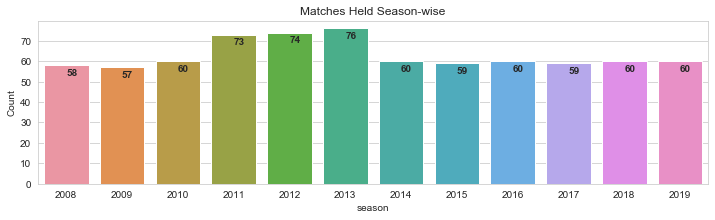

In [22]:
fig, axes = plt.subplots(figsize=(12,3))
axes.set_xlabel('Season')
axes.set_ylabel('Count')
axes.set_title('Matches Held Season-wise');
sns.barplot(x=no_of_matches.index,y=no_of_matches.values)
count=0
for i in no_of_matches:
    axes.text(count,i-5,str(i),fontweight="bold")
    count+=1


**Number of matches won by each team in each season**

In [23]:
match=ipl.groupby("season")["winner"].value_counts()
match

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Capitals                  7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [24]:
groups=match.groupby("season")

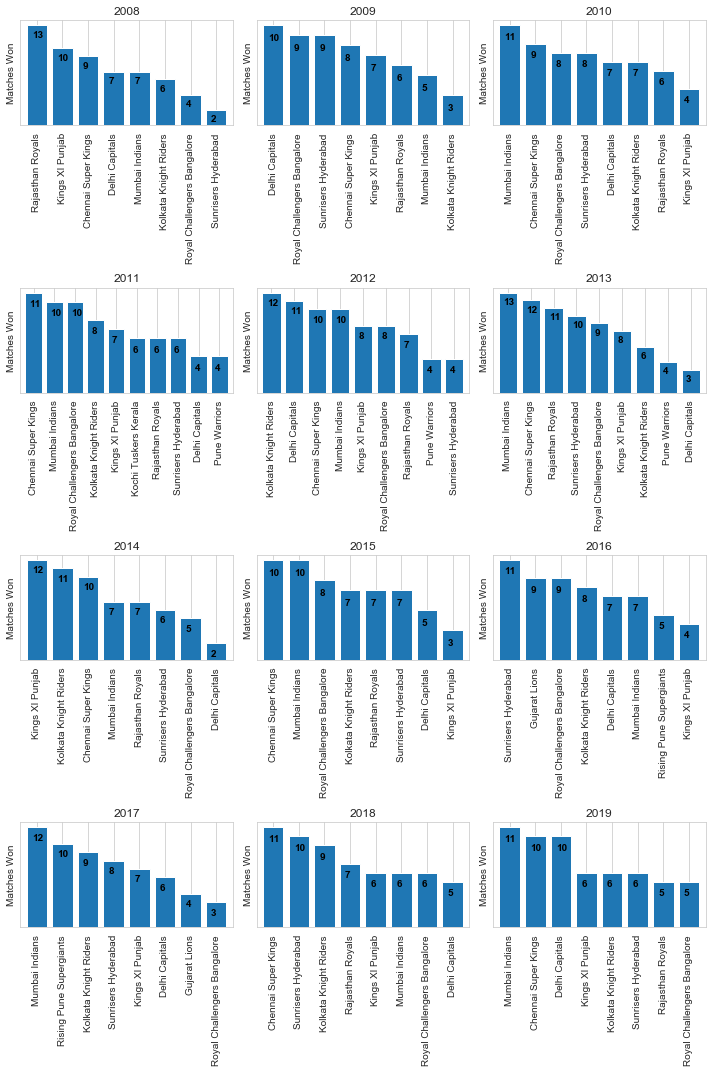

In [25]:
count=1
fig=plt.figure()
for year,group in groups:
    ax = fig.add_subplot(4,3,count)
    ax.set_title(year)
    ax=group[year].plot(kind="bar",figsize=(10,15),width=0.8)
    count=count+1
    plt.xlabel('')
    plt.yticks([])
    plt.ylabel('Matches Won')
    totals = []
    for i in ax.patches:
        totals.append(i.get_height())
    total = sum(totals)
    for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+0.2, i.get_height()-1.5,s= i.get_height(),color="black",fontweight='bold')
    
    
    
plt.tight_layout()

**Total Matches Played by Each Team**

In [26]:
team1=ipl.groupby("team1")["id"].count()
team2=ipl.groupby("team2")["id"].count()
team1=team1.add(team2)
team1

team1
Chennai Super Kings            164
Delhi Capitals                 177
Gujarat Lions                   30
Kings XI Punjab                176
Kochi Tuskers Kerala            14
Kolkata Knight Riders          178
Mumbai Indians                 187
Pune Warriors                   46
Rajasthan Royals               147
Rising Pune Supergiants         30
Royal Challengers Bangalore    180
Sunrisers Hyderabad            183
Name: id, dtype: int64

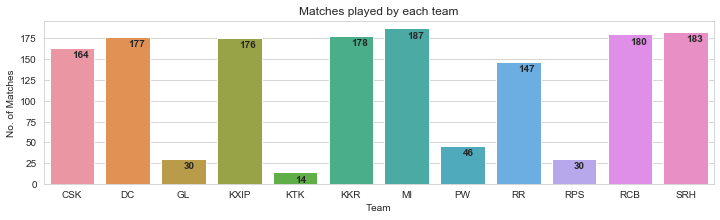

In [27]:
fig, axes = plt.subplots(figsize=(12,3))
axes.set_xlabel('Team')
axes.set_ylabel('No. of Matches')
axes.set_title('Matches played by each team');
sns.barplot(x=[r"CSK",r"DC",r"GL",r"KXIP",r"KTK",r"KKR",r"MI",r"PW",r"RR",r"RPS",r"RCB",r"SRH"],y=team1.values)
count=0
for i in team1:
    axes.text(count,i-12,str(i),fontweight="bold")
    count+=1

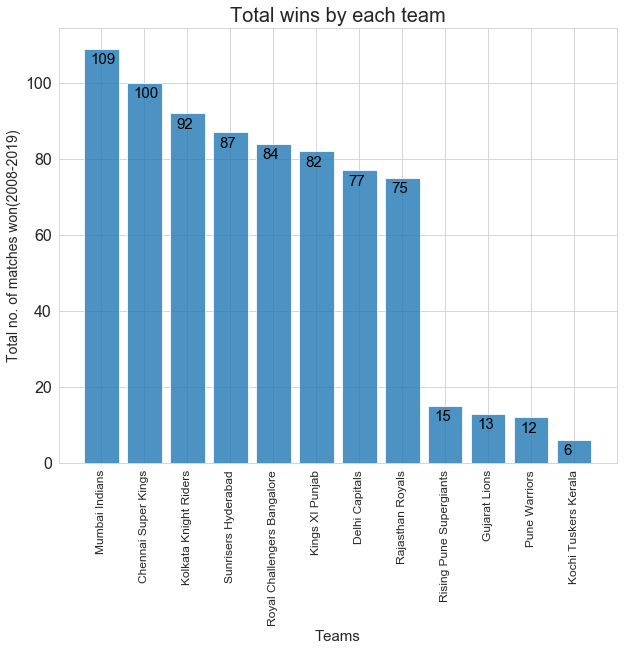

In [28]:
fig=plt.figure()
fig.set_size_inches(10,8)
wins=pd.DataFrame(ipl['winner'].value_counts())
wins['name']=wins.index
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.bar(wins['name'],wins['winner'],alpha=0.8)
count=0
for i in wins['winner']:
    plt.text(count-0.25,i-4,str(i),size=15,color='black')
    count+=1
plt.title('Total wins by each team',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Total no. of matches won(2008-2019)',fontsize=14)
plt.show()


**Success Rate of Each Team**

In [29]:
matches_win=ipl.groupby("winner").count()["id"]
matches_win

winner
Chennai Super Kings            100
Delhi Capitals                  77
Gujarat Lions                   13
Kings XI Punjab                 82
Kochi Tuskers Kerala             6
Kolkata Knight Riders           92
Mumbai Indians                 109
Pune Warriors                   12
Rajasthan Royals                75
Rising Pune Supergiants         15
Royal Challengers Bangalore     84
Sunrisers Hyderabad             87
Name: id, dtype: int64

In [30]:
score=matches_win.values/team1.values

In [31]:
Win_ratio=pd.Series(data=score,index=team1.index)
Win_ratio.sort_values(ascending=False)

team1
Chennai Super Kings            0.609756
Mumbai Indians                 0.582888
Kolkata Knight Riders          0.516854
Rajasthan Royals               0.510204
Rising Pune Supergiants        0.500000
Sunrisers Hyderabad            0.475410
Royal Challengers Bangalore    0.466667
Kings XI Punjab                0.465909
Delhi Capitals                 0.435028
Gujarat Lions                  0.433333
Kochi Tuskers Kerala           0.428571
Pune Warriors                  0.260870
dtype: float64

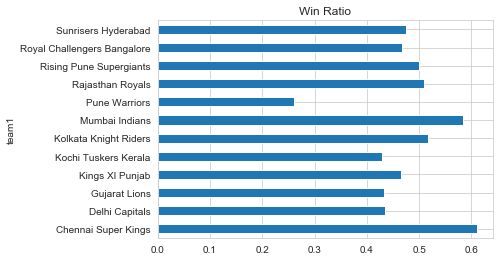

In [32]:
Win_ratio.plot(kind="barh",title="Win Ratio")

**Won vs Lost for each Team**

In [33]:
lost=abs(matches_win.values-team1.values)
Lost_matches=pd.DataFrame(data=lost,index=team1.index,columns=["Lost"])
Lost_matches["Won"]=matches_win
Lost_matches

,Lost,Won
team1,,
Chennai Super Kings,64,100
Delhi Capitals,100,77
Gujarat Lions,17,13
Kings XI Punjab,94,82
Kochi Tuskers Kerala,8,6
Kolkata Knight Riders,86,92
Mumbai Indians,78,109
Pune Warriors,34,12
Rajasthan Royals,72,75


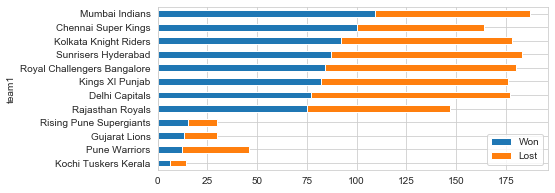

In [34]:
Lost_matches[["Won","Lost"]].sort_values(by=["Won"],ascending=True).plot.barh(stacked=True,figsize=(7,3))

**Each Season Winner**

In [35]:
season_winner = ipl.groupby('season')['season','winner'].tail(1)
season_winner.sort_values(by="season",ascending=True)


D:\Users\Ritvik\Anaconda3\envs\ailab\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,season,winner
116,2008,Rajasthan Royals
173,2009,Sunrisers Hyderabad
233,2010,Chennai Super Kings
306,2011,Chennai Super Kings
380,2012,Kolkata Knight Riders
456,2013,Mumbai Indians
516,2014,Kolkata Knight Riders
575,2015,Mumbai Indians
635,2016,Sunrisers Hyderabad
58,2017,Mumbai Indians


**Team with Maximum IPL Titles**

In [36]:
Title_counts=season_winner["winner"].value_counts()
Title_counts

Mumbai Indians           4
Chennai Super Kings      3
Sunrisers Hyderabad      2
Kolkata Knight Riders    2
Rajasthan Royals         1
Name: winner, dtype: int64

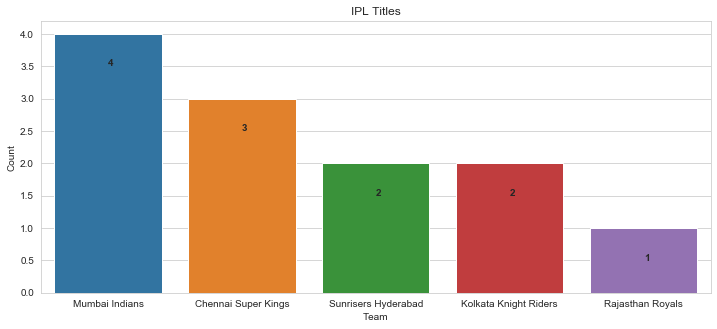

In [37]:
fig, axes = plt.subplots(figsize=(12,5))
axes.set_xlabel('Team')
axes.set_ylabel('Count')
axes.set_title('IPL Titles');
sns.barplot(x=Title_counts.index,y=Title_counts.values)
count=0
for i in Title_counts:
    axes.text(count,i-0.5,str(i),fontweight="bold")
    count+=1

**Matches hosted in Each City** 

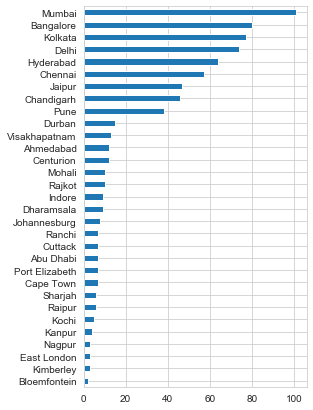

In [38]:
ipl["city"].value_counts(ascending=True).plot(kind="barh",figsize=(4,7))

In [39]:
ipl["city"].value_counts()

Mumbai            101
Bangalore          80
Kolkata            77
Delhi              74
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Mohali             10
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Ranchi              7
Cuttack             7
Abu Dhabi           7
Port Elizabeth      7
Cape Town           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
East London         3
Kimberley           3
Bloemfontein        2
Name: city, dtype: int64

**Top 10 Stadium for Hosting IPL Matches**

In [40]:
stad=ipl["venue"].value_counts()
stadium=pd.DataFrame(stad)
stadium.rename(columns={"venue":"Matches Count"},inplace=True)
stadium["Name"]=stadium.index
stadium.reset_index(inplace=True)
stadium.drop(["index"],inplace=True,axis=1)
stadium

,Matches Count,Name
0,77,Eden Gardens
1,74,Feroz Shah Kotla
2,73,Wankhede Stadium
3,73,M Chinnaswamy Stadium
4,56,"Rajiv Gandhi International Stadium, Uppal"
5,49,"MA Chidambaram Stadium, Chepauk"
6,47,Sawai Mansingh Stadium
7,35,"Punjab Cricket Association Stadium, Mohali"
8,21,Maharashtra Cricket Association Stadium
9,17,Subrata Roy Sahara Stadium


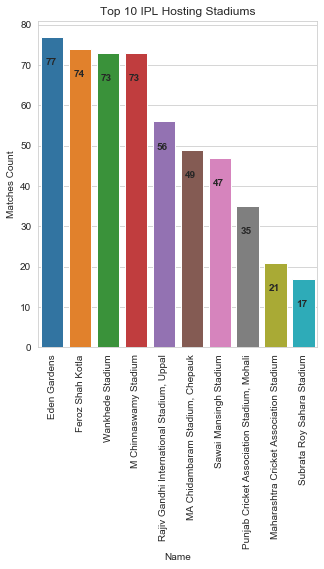

In [41]:
fig = plt.figure(figsize=(5,6))
plt.xticks(rotation=90)
plt.title("Top 10 IPL Hosting Stadiums")
sns.barplot(x="Name",y="Matches Count",data=stadium.head(10))
count=0
for i in stadium["Matches Count"]:
    if count == 10:
        break
    plt.text(count-0.25,i-7,str(i),fontweight="bold")
    count+=1
    

**Top 20 Best Performers in IPL**

In [42]:
players=pd.DataFrame(ipl['player_of_match'].value_counts())
players['name']=players.index
players=players.head(20)
players.rename(columns={"player_of_match":"Count"},inplace=True)
players.reset_index(inplace=True)
players.drop(["index"],inplace=True,axis=1)
players

,Count,name
0,21,CH Gayle
1,20,AB de Villiers
2,17,DA Warner
3,17,MS Dhoni
4,17,RG Sharma
5,16,YK Pathan
6,15,SR Watson
7,14,SK Raina
8,13,G Gambhir
9,12,AM Rahane


Text(0, 0.5, 'No. of Man_Of_Match won')

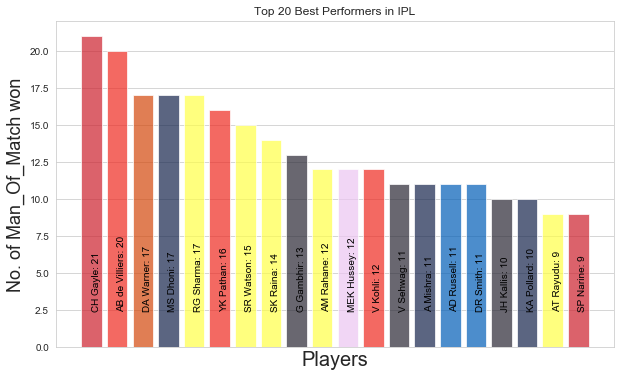

In [43]:
fig=plt.figure(figsize=(10,6))
plt.title("Top 20 Best Performers in IPL")
plt.xticks([],rotation=90)

plt.bar(players["name"],players["Count"],color=['#CD202D','#EF2920','#D4480B','#15244C','#FFFF48','#EF2920',
               '#FFFF48','#FFFF48','#292734','#FFFF48','#ECC5F2','#EF2920',
               '#292734','#15244C','#005DB7','#005DB7','#292734','#15244C',
               '#FFFF48','#CD202D'],alpha=0.7)
count=0
for i in players['Count']:
    plt.text(count,2.5,players['name'][count]+': '+str(i),rotation=90,color='black',size=10)
    count+=1
plt.xlabel('Players',fontsize=20)
plt.ylabel('No. of Man_Of_Match won',fontsize=18)

**CSK Vs MI (Head to Head)**

In [44]:
micsk=ipl[np.logical_or(np.logical_and(ipl['team1']=='Mumbai Indians',ipl['team2']=='Chennai Super Kings'),np.logical_and(ipl['team2']=='Mumbai Indians',ipl['team1']=='Chennai Super Kings'))]

In [45]:
H2H=micsk["winner"].value_counts()
H2H

Mumbai Indians         17
Chennai Super Kings    11
Name: winner, dtype: int64

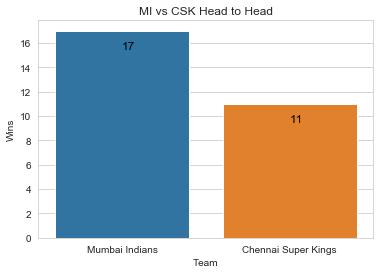

In [46]:
fig=plt.figure()
#plt.xticks(rotation=90)
plt.xlabel("Team")
plt.ylabel("Wins")
plt.title("MI vs CSK Head to Head")
sns.barplot(x=H2H.index,y=H2H.values)
count=0
for i in H2H:
    plt.text(count,i-1.5,str(i),color="black",size=12)
    count+=1

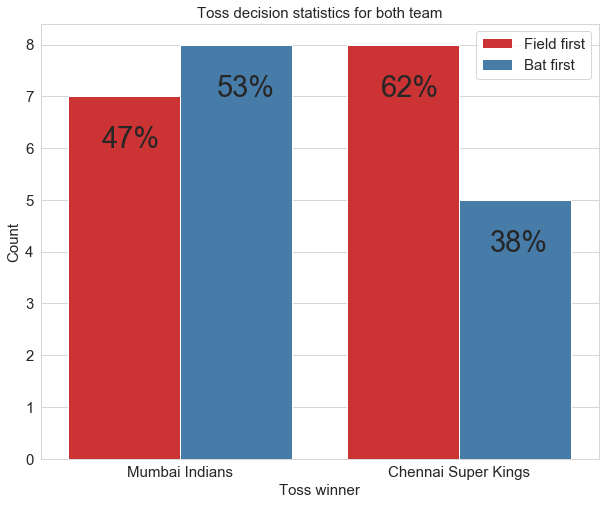

In [47]:
fig=plt.figure(figsize=(10,8))
sns.countplot(micsk['toss_winner'],order=micsk['toss_winner'].value_counts().index,palette='Set1',hue=ipl['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.text(-0.28,6,str(int((7/15)*100)+1)+'%',fontsize=29)
plt.text(0.13,7,str(int((8/15)*100))+'%',fontsize=29)
plt.text(0.72,7,str(int((8/13)*100)+1)+'%',fontsize=29)
plt.text(1.11,4,str(int((5/13)*100))+'%',fontsize=29)
plt.legend(['Field first','Bat first'],loc='best',fontsize=15)

**Most Win by runs in Each Season**

In [48]:
s=2008
season=[]
win_by_runs_max=[]
while s<2020:
    season.append(s)
    win_by_runs_max.append(ipl[ipl['season']==s]['win_by_runs'].max())
    s+=1

In [49]:
season

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [50]:
win_by_runs_max

[140, 92, 98, 111, 86, 130, 93, 138, 144, 146, 102, 118]

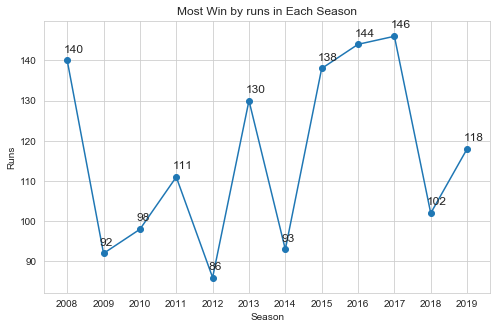

In [51]:
fig=plt.figure(figsize=(8,5))
plt.title("Most Win by runs in Each Season")
plt.xlabel("Season")
plt.ylabel("Runs")
plt.xticks(range(2008,2020))
plt.yticks(range(90,151,10))
plt.plot(season,win_by_runs_max)
plt.scatter(season,win_by_runs_max)
count=0
while count<12:
    plt.text(season[count]-0.1,win_by_runs_max[count]+2,str(win_by_runs_max[count]),size=12)
    count+=1


## 5. Result

* Most number of matches held in one season is 76 in Season 2013, As there are total 9 teams in that season and each team has to compete with other teams twice (72 combinations) + 2 qualifier + 1 eliminator + 1 final = 76 matches.
* Totally 13 teams has participated in IPL History and few teams like Pune Warriors,Kochi Tuskers Kerala,Rising Pune Supergiants, Gujarat Lions has been only in 2 seasons but the success rate of Rising Pune Supergiants is good comparatively among the new teams.
* Overall Chennai Super Kings and Mumbai Indians have high success rate and these two teams are the most successful teams in the tournament with Mumbai Indians with 4 Titles and Chenai Super Kings with 3 Titles.
* From the analysis, it can be concluded that Chennai Super Kings and Mumbai Indians are more likely to win upcoming IPL seasons. 